In [1]:
import pandas as pd
from bs4 import BeautifulSoup

In [23]:
from urllib.request import urlopen
url_base = 'http://movie.naver.com/'
url_sub = 'movie/sdb/rank/rmovie.nhn?sel=cur&date=20200410'

page = urlopen(url_base + url_sub)

soup = BeautifulSoup(page, 'lxml')
soup

<!DOCTYPE html>
<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image"/>
<meta content="네이버영화 " property="me2:post_tag"/>
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&amp;date=20200410" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>


In [24]:
soup.find_all('div', 'tit5')[:5]

[<div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=19099" title="트루먼 쇼">트루먼 쇼</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=52515" title="인셉션">인셉션</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=148338" title="동급생">동급생</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=187308" title="조조 래빗">조조 래빗</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=168050" title="스타 이즈 본">스타 이즈 본</a>
 </div>]

In [25]:
soup.find_all('div', 'tit5')[0].a.string

'트루먼 쇼'

In [26]:
soup.find_all('td', 'point')[0].string

'9.33'

In [32]:
date = pd.date_range('2020-1-1', periods=100, freq='D')
date

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20',
               '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
               '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01',
               '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05',
               '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09',
               '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13',
               '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17',
               '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21',
               '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25',
      

In [36]:
import urllib
from tqdm import tqdm_notebook

movie_date = []
movie_name = []
movie_point = []

for today in tqdm_notebook(date):
    html = 'http://movie.naver.com/' + 'movie/sdb/rank/rmovie.nhn?sel=cur&date={date}'
    response = urlopen(html.format(date=urllib.parse.quote(today.strftime('%Y%m%d'))))
    soup = BeautifulSoup(response, 'lxml')
    end = len(soup.find_all('td', 'point'))
    
    movie_date.extend([today for n in range(0, end)])
    movie_name.extend([soup.find_all('div', 'tit5')[n].a.string for n in range(0, end)])
    movie_point.extend([soup.find_all('td', 'point')[n].string for n in range(0, end)])

In [69]:
movie = pd.DataFrame({'date':movie_date, 'name':movie_name, 'point':movie_point})
movie.head()

,date,name,point
0,2020-01-01,포드 V 페라리,9.57
1,2020-01-01,주전장,9.53
2,2020-01-01,눈의 여왕4,9.32
3,2020-01-01,러브 앳,9.27
4,2020-01-01,교회오빠,9.27


In [89]:
movie['point'] = movie['point'].astype(float)

In [55]:
import numpy as np
movie_unique = pd.pivot_table(movie, index=['name'], aggfunc=np.sum)
movie_best = movie_unique.sort_values(by='point', ascending=False)
movie_best.head()

,point
name,
나이브스 아웃,912.23
벌새,882.15
포드 V 페라리,866.34
결혼 이야기,825.78
두 교황,822.10


In [91]:
tmp = movie.query('name=="벌새"')
tmp

,date,name,point
14,2020-01-01,벌새,8.88
53,2020-01-02,벌새,8.88
90,2020-01-03,벌새,8.88
127,2020-01-04,벌새,8.88
164,2020-01-05,벌새,8.88
...,...,...,...
4357,2020-04-05,벌새,8.76
4414,2020-04-06,벌새,8.76
4461,2020-04-07,벌새,8.76
4511,2020-04-08,벌새,8.76


In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

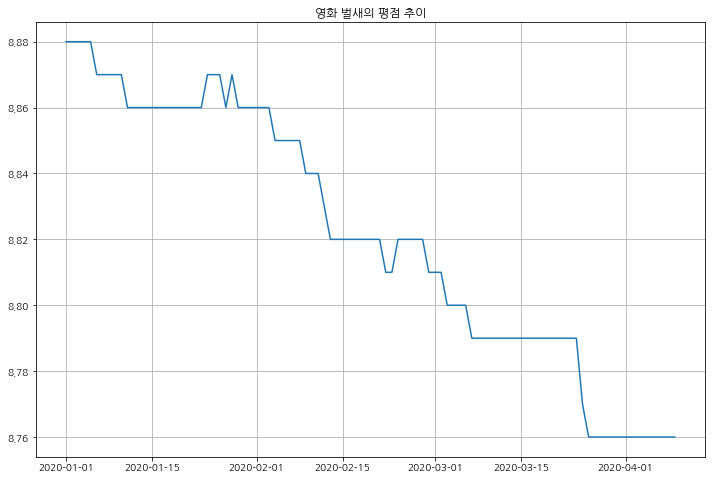

In [98]:
plt.figure(figsize=(12,8))
plt.plot(tmp['date'], tmp['point'])
# plt.legend()
plt.grid()
plt.title('영화 벌새의 평점 추이')
# plt.ylim(8.5,9)
plt.show()

In [109]:
movie_pivot = pd.pivot_table(movie, index=['date'], columns=['name'], values=['point'])
movie_pivot.head()

point                                                        \
name        1917 21 브릿지: 테러 셧다운 500일의 썸머 82년생 김지영 가장 따뜻한 색, 블루 감쪽같은 그녀   
date                                                                     
2020-01-01   NaN            NaN      NaN     6.69          NaN    7.52   
2020-01-02   NaN            NaN      NaN     6.69          NaN     NaN   
2020-01-03   NaN            NaN      NaN     6.69          NaN     NaN   
2020-01-04   NaN            NaN      NaN     6.69          NaN     NaN   
2020-01-05   NaN            NaN      NaN     6.69          NaN     NaN   

                                       ...                           \
name       걸어도 걸어도 겟 아웃 겨울왕국 2 결혼 이야기  ... 하이큐!! 끝과 시작 하이큐!! 승자와 패자   
date                                   ...                            
2020-01-01     NaN  NaN   8.71   9.10  ...         NaN          NaN   
2020-01-02     NaN  NaN   8.71   9.10  ...         NaN          NaN   
2020-01-03     NaN  NaN   8.71   9.09  ...         NaN          NaN   
2020-01-04     NaN  NaN   8.71   9.09  ...         NaN          NaN   
2020-01-05     NaN  NaN   8.71   9.07  ...         NaN          NaN   

                                                                             \
name       하이큐!! 재능과 센스 해리 포터와 아즈카반의 죄수 해치지않아 핵소 고지 환상의 빛 흑집사 : 북 오브 더 아틀란틱   
date                                                                          
2020-01-01          NaN             NaN   NaN   NaN   NaN               NaN   
2020-01-02          NaN             NaN   NaN   NaN   NaN               NaN   
2020-01-03          NaN             NaN   NaN   NaN   NaN               NaN   
2020-01-04          NaN             NaN   NaN   NaN   NaN               NaN   
2020-01-05          NaN             NaN   NaN   NaN   NaN               NaN   

                    
name        히트 히트맨  
date                
2020-01-01 NaN NaN  
2020-01-02 NaN NaN  
2020-01-03 NaN NaN  
2020-01-04 NaN NaN  
2020-01-05 NaN NaN  

[5 rows x 192 columns]

In [110]:
movie_pivot.columns = movie_pivot.columns.droplevel()
movie_pivot.head()

name,1917,21 브릿지: 테러 셧다운,500일의 썸머,82년생 김지영,"가장 따뜻한 색, 블루",감쪽같은 그녀,걸어도 걸어도,겟 아웃,겨울왕국 2,결혼 이야기,...,하이큐!! 끝과 시작,하이큐!! 승자와 패자,하이큐!! 재능과 센스,해리 포터와 아즈카반의 죄수,해치지않아,핵소 고지,환상의 빛,흑집사 : 북 오브 더 아틀란틱,히트,히트맨
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,NaN,NaN,NaN,6.69,NaN,7.52,NaN,NaN,8.71,9.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,6.69,NaN,NaN,NaN,NaN,8.71,9.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,6.69,NaN,NaN,NaN,NaN,8.71,9.09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,6.69,NaN,NaN,NaN,NaN,8.71,9.09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,NaN,NaN,NaN,6.69,NaN,NaN,NaN,NaN,8.71,9.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
movie_pivot.columns[:50]

Index(['1917', '21 브릿지: 테러 셧다운', '500일의 썸머', '82년생 김지영', '가장 따뜻한 색, 블루',
       '감쪽같은 그녀', '걸어도 걸어도', '겟 아웃', '겨울왕국 2', '결혼 이야기', '고양이를 빌려드립니다', '공기인형',
       '교회오빠', '그것만이 내 세상', '그녀', '그녀에게', '그랜드 부다페스트 호텔', '그렇게 아버지가 된다',
       '그린 북', '그을린 사랑', '극장판 원피스 스탬피드', '극장판 쿠로코의 농구 라스트 게임', '극한직업', '기생충',
       '김군', '김복동', '꾸뻬씨의 행복여행', '끝까지 간다', '나, 다니엘 블레이크', '나쁜 녀석들 : 포에버',
       '나이브스 아웃', '날씨의 아이', '남산의 부장들', '내부자들', '내일을 위한 시간', '너의 이름은.', '노팅 힐',
       '눈의 여왕2: 트롤의 마법거울', '눈의 여왕4', '다크 워터스', '닥터 두리틀', '대통령의 7시간', '더 와이프',
       '더 울프 오브 월 스트리트', '더 킹: 헨리 5세', '더 포리너', '덩케르크', '델마와 루이스', '동감',
       '동급생'],
      dtype='object', name='name')

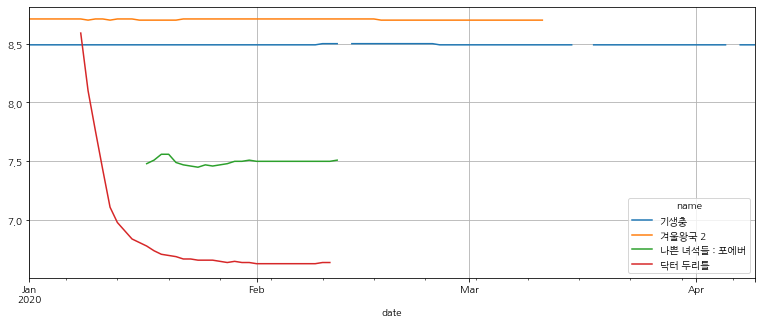

In [118]:
movie_pivot.plot(y=['기생충', '겨울왕국 2', '나쁜 녀석들 : 포에버', '닥터 두리틀'], figsize=(13, 5))
plt.grid()
plt.show();